C:\Users\user.DESKTOP-K1NFF6M\AppData\Local\Temp\ipykernel_19068\730609479.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')


Mean Squared Error (MSE): 32847439774.12
R-squared (R²): 0.03


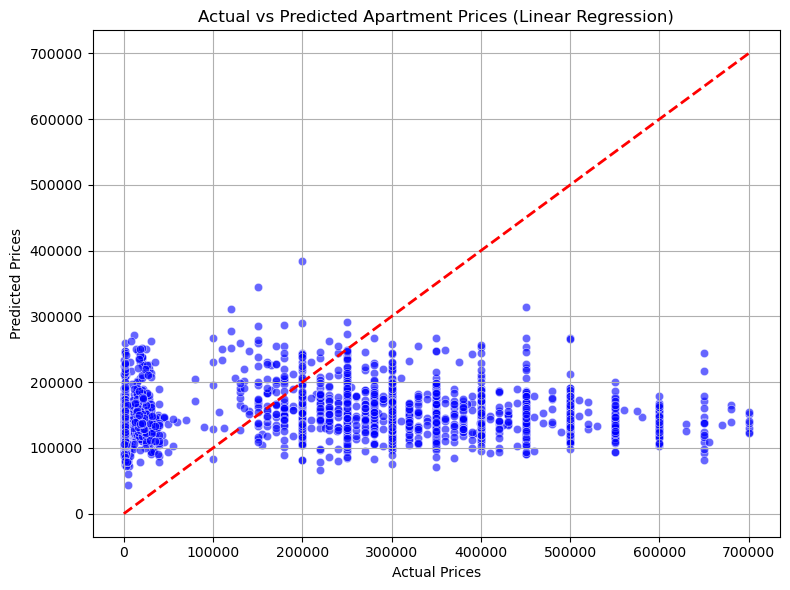

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('apartment_for_rent_train.csv')

df = df.drop_duplicates()
df_cleaned = df.dropna()

df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')
Q1 = df_cleaned['Price'].quantile(0.25)
Q3 = df_cleaned['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df_cleaned[(df_cleaned['Price'] >= lower_bound) & (df_cleaned['Price'] <= upper_bound)]

df_cleaned['Address'] = df_cleaned['Address'].astype('category').cat.codes
categorical_cols = ['Balcony', 'Furniture', 'Renovation', 'Children_are_welcome', 'Pets_allowed']
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].astype('category').cat.codes

df_cleaned['Number_of_rooms'] = pd.to_numeric(df_cleaned['Number_of_rooms'], errors='coerce')

features = ['Address', 'Number_of_rooms', 'Renovation', 'Balcony', 'Furniture', 'Children_are_welcome', 'Pets_allowed']
X = df_cleaned[features]
y = df_cleaned['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Apartment Prices (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.savefig("linear_regression_actual_vs_predicted.png")
plt.show()
